In [10]:
import numpy as np
import matplotlib.pyplot as plt

### Vertical Jump Physics
**Hard to calculate and estimate the force/power of jump without force plates measurements, 
due to the variable force/Power/acelaration/velocity of the movement. 
For this reason, the jump height inference from squat values are not too simple, besides the lack or not of fast-twitch (Rate of force development) training.
Another interesting and dificulty, it's related to running jump and standing jump physical aspects**

**From energy perspective using basic physics, the potential energy i given by,**
$$E_{jump}=mgh$$
    
**For a male with 80 kg, in order to jump 50/90 cm, it is required**

$$E_{jump50}=80\times 9.81\times 0.5=392.4 J $$
$$E_{jump90}=80\times 9.81\times 0.9=706.32 J $$

**Because of the kinetic movement of the body, the body transform kinetic energy almost totally in potential energy from the bending position (intial velocity equal zero) disregarding air drag and body issues**
$$E_{jump50}=KE_{jump50}$$
$$E_{jump50}=\frac{mv_{avg}^2}{2}$$
$$v_{avg}=\sqrt{\frac{2\times E_{jump50}}{m}}=3.13 \ m/s$$




In [11]:
BW= 80 # Body Weight mass kg
g=9.81 # Gravitational acceleration
VJ=np.asarray([50,90]) # Vertical jump in cm

# Energy
Ejump=BW*g*VJ/100
Vmax=np.sqrt(2*Ejump/BW)

print('Ejump 50cm: {} J'.format(Ejump[0]))
print('Vmax 50cm: {} m/s'.format(Vmax[0]))
print('Ejump 90cm: {} J'.format(Ejump[1]))
print('Vmax 90cm: {} m/s'.format(Vmax[1]))


Ejump 50cm: 392.4 J
Vmax 50cm: 3.1320919526731648 m/s
Ejump 90cm: 706.32 J
Vmax 90cm: 4.2021423107743505 m/s


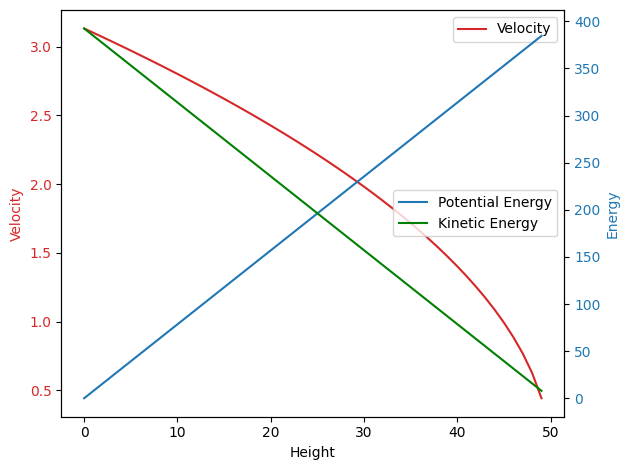

In [12]:
#Analazing the movement

heightMovement=np.arange(0,50)
EMAX=BW*g*VJ[0]/100
Epmovement=BW*g*heightMovement/100
KEmovement=EMAX-Epmovement
Vmovement=np.sqrt(2*KEmovement/BW)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Height')
ax1.set_ylabel('Velocity', color=color)
ax1.plot(heightMovement, Vmovement, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Velocity'])

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color=color)  # we already handled the x-label with ax1
ax2.plot(heightMovement, Epmovement, color=color)
ax2.plot(heightMovement, KEmovement, color='g')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['Potential Energy', 'Kinetic Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**That's the hard part, let's follow my reasoning, I DON'T KNOW if am I wrong, that's my nightmare hahhaha. The initial velocity is zero, only at the point we bend the hips and flex the knee in order to create power, after that moment we apply some force, we accelarate, the application of force ends up when we leave the ground, after that we have only desacceleration force (gravity). Then, it means the peak velocity occurs right after leaving the ground? Considering the takeoff velocity, the maximum one, let's go deep into the kinematics equation in order to try and to get more info**
$$h=V_{takeoff}t-\frac{gt^2}{2}$$
$$ -\frac{gt^2}{2}+V_{takeoff}t -h$$

**solving the quadratic equation**
$$ t=\frac{-V_{takeoff}\pm \sqrt{V_{takeoff}^2-4\times (-g/2) \times h}}{2\times (-g/2)}$$
**We have half the flight time, the rising time**

$$ t_{rise50cm}=0.31 s$$
$$ t_{rise90cm}=0.42 s$$

**Flight time it is important, because without equipaments, from video frames we can infer the vertical leap**
$$VerticalJump=\frac{gt_{flight}^2}{8}=\frac{gt_{rise}^2}{2}=\frac{gt_{fall}^2}{2}$$

In [13]:
coeff = [-g/2, Vmax[0],-VJ[0]/100]
tjump50=np.roots(coeff)
Vert50=g*np.pow(tjump50[0],2)/2
tjump50eq=-(Vmax[0]+np.sqrt(np.pow(Vmax[0],2)-4*(-g/2)*(-VJ[0])/100))/(2*(-g/2))
coeff = [-g/2, Vmax[1],-VJ[1]/100]
tjump90=np.roots(coeff)
tjump90eq=-(Vmax[0]+np.sqrt(np.pow(Vmax[0],2)-4*(-g/2)*(-VJ[1])/100))/(2*(-g/2))
print('Rise time 50 cm: {} s'.format(tjump50[0]))
print('Check Trise for 50 cm: {} s'.format(Vert50))
print('Rise time 90 cm: {} s'.format(tjump90[0]))


Rise time 50 cm: (0.3192754284070505+4.272721855565856e-09j) s
Check Trise for 50 cm: (0.5+1.3382557739828572e-08j) s
Rise time 90 cm: (0.4283529368781194+6.937336685475928e-09j) s


/tmp/ipykernel_2007/3190467595.py:4: RuntimeWarning: invalid value encountered in sqrt
  tjump50eq=-(Vmax[0]+np.sqrt(np.pow(Vmax[0],2)-4*(-g/2)*(-VJ[0])/100))/(2*(-g/2))
/tmp/ipykernel_2007/3190467595.py:7: RuntimeWarning: invalid value encountered in sqrt
  tjump90eq=-(Vmax[0]+np.sqrt(np.pow(Vmax[0],2)-4*(-g/2)*(-VJ[1])/100))/(2*(-g/2))


**The thing is, indeed, that different people, with different forces and jump characteristics can achieve the same Energ (height), the other side is also true, People with equivalent forces, can have different jump heights(Energies).**

**However to anayze the vertical leap, it's more meaningful in terms of Power.Then how to calculate our power/force we apply?**

$$P=W/t$$

**Where work, it can be seen as the variation of energy, in this case, while resting without movement of hips/knee, null velocity, 
we have 0 J. But when we bend hips (flex knee) we go into the human spring model, as fas as I could understand**

$$W=\int_{x_0}^{x_f}F(t)dx=E$$ 

**Considering the average force**
$$W=Fx$$ 
**Then if there are two athletes with equal force, same height, same weight**
$$F_1=F_2=F$$
**But during the force production phase, the athlete 1, apply the force F1 faster**
$$ t_1 < t_2 $$
$$\frac{F x}{t_1}>\frac{F x}{t_2}$$
$$P_1>P_2$$
**Tela azul pra mim, e agora a energia**

**As the human spring model provides a time-variant Force (elastic constant) dependent on many muscles, tendons, etc. The power analysis is carried ou usually using force plates in order to obtain the force-time, velocity-time, power-time curves during the leap.**

![image info](./HAWKINDYNAMICS_CMJ-png.webp)

Ref:https://www.hawkindynamics.com/blog/quadrant-report 
https://learning.hawkindynamics.com/knowledge/understanding-force-plate-data 

**By the force Plates measurements i've seen the acceleration follows a polynomial equation of high order. I found hill model from muscle, but has too much variables and require a deep knowledge of biomechanics, a lot of tendon-muscle and joints, that I dont have. My will, it was to relate the mucle-stiffness and tendon stiffness to the RFD, as they are very important to the vertical jump, and assessed by measurements of each athlete , using an simplified equation and model to account for that.**

**Considering the average elastic force (average const)**

$$U=\int_{x_0}^{x_f}F_e(t)dx=\int_{x_0}^{x_f}K(t)x(t)dx$$ 
$$U=K\int_{x_0}^{x_f}x dx=K\frac{x^2}{2}|_{x_0}^{x_f}$$ 


**Relating Impulse, momentum and Power: The force plates generally provide the force-time curve, the impulse generated at each time step, which is transferred into Linear momentum**
$$I=\Delta P= \sum \int_{t_0}^{t_f} F(t) \Delta t =m(v_{f}-v_{0})=mv_{f}$$
**Integration is not that monster, I don't know, but it is not hard**
**Acelaration can be derived**

$$ a=\frac{F(t)}{t}$$

**Classical Models**

**Lewis Average Power**

Average Power (Watts) = √ 4.9 x body mass (kg)  x √ jump-reach score (m) x 9.81 

**Johnson & Bahamonde Formula**

Power-peak (W) = 78.6 · VJ (cm) + 60.3 · mass (kg) - 15.3 · height (cm) - 1,308

Power-avg (W) = 43.8 · VJ (cm) + 32.7 · mass (kg) - 16.8 · height (cm) + 431

**Sayers Peak Anaerobic Power output**
PAPw (Watts) = 60.7 · jump height(cm) + 45.3 · body mass(kg) - 2055

In [14]:
# h height in cm 
# VJ vertical jump in cm
# BW Body Weight in kg
def jumpPeakPower(Ref,BW,h,VJ):
    if Ref=='Bahamonde':
        PW= 78.6*VJ + 60.3*BW - 15.3*h - 1,308
        return PW
    elif Ref=='Sayer':
        PW= 60.7*VJ+ 45.3*BW - 2055
        return PW
    
def jumpAvgPower(Ref,BW,h,VJ):
    if Ref=='Lewis':
        PW= np.sqrt(4.9)*BW* np.sqrt(VJ/100)*9.81 
        return PW
    elif Ref=='Bahamonde':
        PW= 43.8*VJ + 32.7*BW - 16.8*h + 431
        return PW
    elif Ref=='Harman':
        PW= 21.2*VJ+ 23.0*BW -1393
        return PW
def jumpAvgPowerSimple(Ref,BW,h,VJ):
    PW= np.sqrt(4.9)*BW* np.sqrt(VJ/100)*9.81 
    return PW


**Reference**
https://www.researchgate.net/publication/23254945_A_simple_method_for_measuring_force_velocity_and_power_output_during_squat_jump
**Correcting my errors**


In [15]:
hd=39/100 # Rough Approximation of hip bending, Knee flexion distance which depends on each Body(height) and jump technique,
## Maybe for that Bahamonde formula has better correlation with my rough approximation. Needed further research and review
## I noted that to have more correlation with Bahamonde, for 90 cm jump height, I needed to increase hip bending distance to 38 cm to fit 
# (thats the case generally for higher jumpers, they flex more the knee),
## for 50 cm jump height, the best value was 30 cm. 

hjump=VJ[1]
vjump=Vmax[1]
a=np.pow(vjump,2)/(2*hd)
t=np.sqrt(2*hd/a)
Favg=BW*a
Pwr=Favg*hd/t

PLewis=jumpAvgPower('Lewis',BW,190,hjump)
PBahamonde=jumpAvgPower('Bahamonde',BW,190,hjump)
PHarman=jumpAvgPower('Harman',BW,190,hjump)

PLewis=jumpAvgPower('Lewis',BW,190,hjump)
PBahamonde=jumpAvgPower('Bahamonde',BW,190,hjump)

print('Bahamonde AvgPower {} cm: {} w'.format(hjump,PBahamonde))
print('Harman AvgPower {} cm: {} w'.format(hjump,PHarman))
print('Lewis AvgPower {} cm: {} w'.format(hjump,PLewis))
print('Pwr {} cm: {} W'.format(hjump,Pwr))


Bahamonde AvgPower 90 cm: 3797.0 w
Harman AvgPower 90 cm: 2355.0 w
Lewis AvgPower 90 cm: 1648.0800000000002 w
Pwr 90 cm: 3805.2014832642803 W


**Squat Bar Velocity**
**REF: Predicting Vertical Jump Height from Bar Velocity**

$$Jump height (cm) = 16.577·Vmax - 16.384$$

In [16]:
BW= 80 # Body Weight mass kg
BarW=120 #kg 
g=9.81 # Gravitational acceleration
hjump=np.asarray([5]) # Rough approximation of Vertical jump for heavy load equal to 6 cm
## Too much dependece and variation, too hard
# Energy
BWComb=BarW+BW
Ejump=BWComb*g*hjump/100
Vmax=np.sqrt(2*Ejump/BWComb)
print('Vmax 0.5 cm: {} m/s'.format(Vmax[0]))


hd=39/100 # Rough Approximation of hip bending, Knee flexion distance which depends on each Body(height) and jump technique,

t=np.sqrt(2*hd/a)
Favg=BWComb*a
Pwr=Favg*hd/t

PLewis=jumpAvgPower('Lewis',BWComb,190,hjump)
PBahamonde=jumpAvgPower('Bahamonde',BWComb,190,hjump)
PBahamondeBWSamePwr=jumpAvgPower('Bahamonde',BW,190,90)
PHarman=jumpAvgPower('Harman',BWComb,190,hjump)

PLewis=jumpAvgPower('Lewis',BWComb,190,hjump)
PBahamonde=jumpAvgPower('Bahamonde',BWComb,190,hjump)

print('Bahamonde BW with Bar {} kg AvgPower {} cm: {} w'.format(BarW,hjump,PBahamonde))
print('Bahamonde BW  AvgPower {} cm: {} w'.format(90,PBahamondeBWSamePwr))
print('Harman BW with Bar {} kg AvgPower {} cm: {} w'.format(BarW,hjump,PHarman))
print('Lewis BW with Bar {} kg AvgPower {} cm: {} w'.format(BarW,hjump,PLewis))
print('Pwr {} cm: {} W'.format(hjump,Pwr))


Vmax 0.5 cm: 0.9904544411531506 m/s
Bahamonde BW with Bar 120 kg AvgPower [5] cm: [3998.] w
Bahamonde BW  AvgPower 90 cm: 3797.0 w
Harman BW with Bar 120 kg AvgPower [5] cm: [3313.] w
Lewis BW with Bar 120 kg AvgPower [5] cm: [971.14045328] w
Pwr [5] cm: 9513.0037081607 W


REf: https://www.nsca.com/contentassets/7fc346ec744044b6871541e5a6ee5c63/velocity_based_training__from_theory_to.99257.pdf?srsltid=AfmBOooJfug1lZ2bJltKqWhQhkKDwPrW4MvE85Sl2NF-1pMjRZs6cjNT

Swmming stroke power/force calculation is not for human being, only for gods